number of detected faces: 25


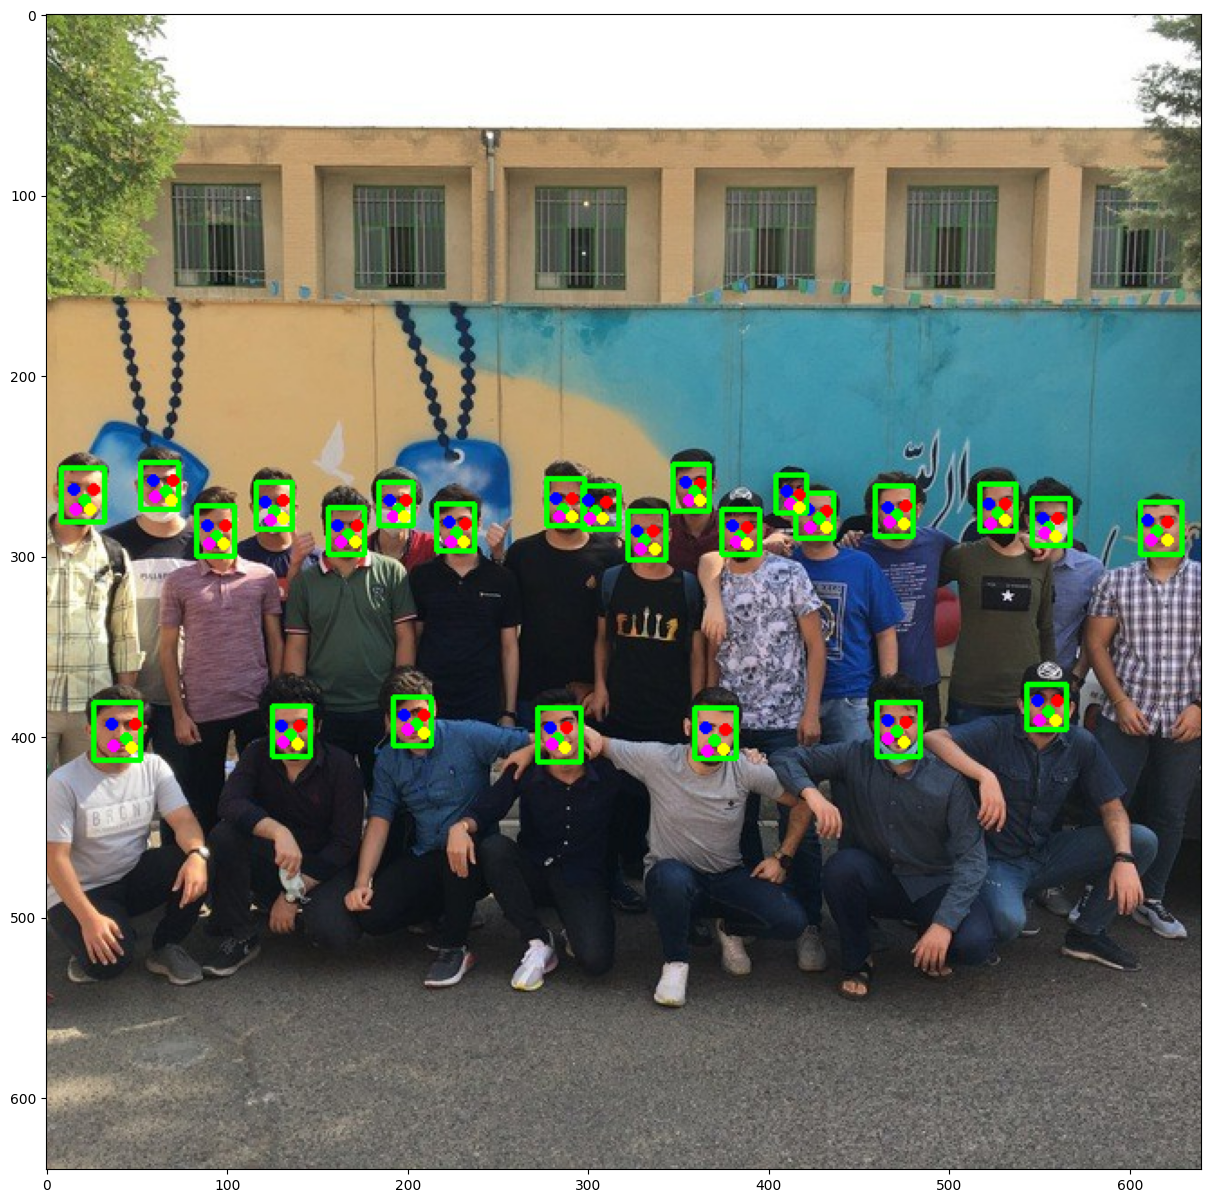

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.3,
    0.2,
    5000
)

image = cv2.imread("test.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)
print("number of detected faces:", len(result[1]))

thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.figure(figsize=[30,15])
plt.imshow(image[...,::-1]);


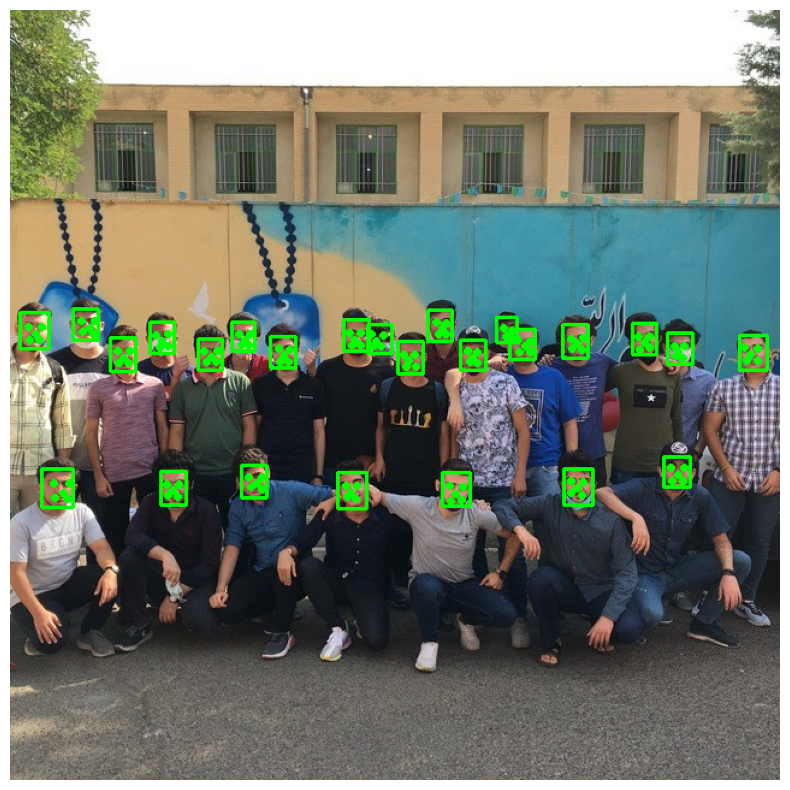

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize face detector once
detector = cv2.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx", "", (320, 320), 0.3, 0.2, 5000) 

# Read image once
image = cv2.imread("test.jpg")
height, width = image.shape[:2] 

# Set input size once
detector.setInputSize((width, height))

# Detect faces
results = detector.detect(image)
faces = results[1]

# Draw detections
thickness = 2
for face in faces:
    coords = face[:-1].astype(np.int32)
    
    # Draw bounding box
    cv2.rectangle(image, (coords[0], coords[1]), 
                  (coords[0]+coords[2], coords[1]+coords[3]), 
                  (0, 255, 0), thickness)
    
    # Draw landmarks
    for i in range(4, coords.shape[0], 2):
        cv2.circle(image, (coords[i], coords[i+1]), 
                   2, (0, 255, 0), thickness)

# Display image            
plt.figure(figsize=[15,8]) 
plt.imshow(image[...,::-1])
plt.axis('off')
plt.tight_layout()
plt.show()